## Question 1:
The Central Limit Theorem states that for any random variable $X$, its distribution approaches normality with mean ($\mu$) and standard deviation ($\frac{\sigma}{\sqrt{n}}$), where ($\sigma$) is the population standard deviation and (n) is the sample size. This leads to the 95% confidence interval:

$$\mu - Z_{0.975} \frac{\sigma}{\sqrt{n}} \leq X \leq \mu + Z_{0.975} \frac{\sigma}{\sqrt{n}} $$

where ($Z_{0.975} \approx 1.96$).

For population proportion (p), the confidence interval is:

$$\bar{X} - Z_{0.975} \frac{S_X}{\sqrt{N}} \leq p \leq \bar{X} + Z_{0.975} \frac{S_X}{\sqrt{N}} $$

where (N) is the sample size, ($\bar{X}$) is the sample proportion ($\hat{p}$), and ($S_X = \sqrt{\hat{p}(1 - \hat{p})}$) is the sample standard deviation.

## Question 2:

The simulation shows that the confidence interval captures the true proportion $p$ about 93% of the time, which is slightly below the expected 95%. This occurs due to the small sample size ($N = 30$), making the normal approximation less accurate. Increasing $N$ (e.g., to 100) would improve accuracy and bring the probability closer to 95%.


True proportion (p): 0.47
Number of simulations: 100000
Sample size (N): 30
Confidence level: 95.0%
Percentage of CIs that captured true value: 93.23%
Expected percentage based on confidence level: 95.0%


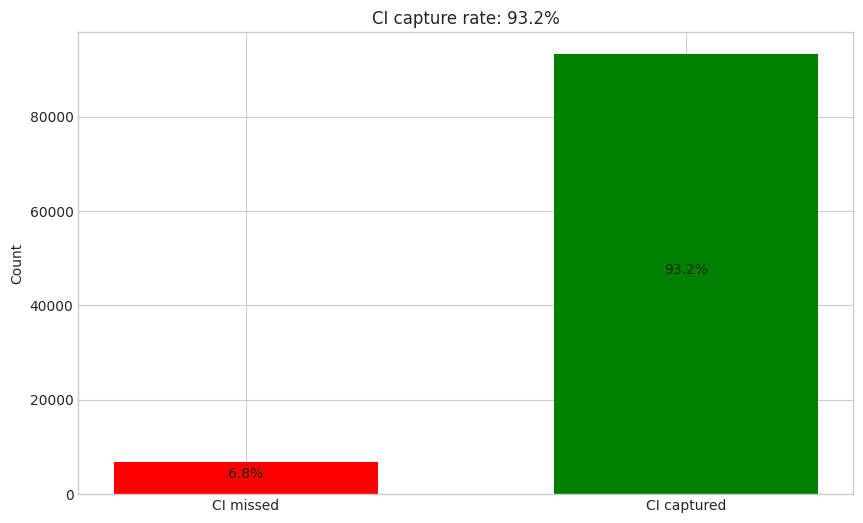

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set up parameters
true_p = 0.47  # true proportion supporting Democratic candidate
N = 30  # sample size
num_iterations = 10**5  # number of simulations
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)  # z-value for 95% CI (approx 1.96)

# Track whether each simulation's CI captures the true p
captures_true_value = np.zeros(num_iterations, dtype=bool)

# Run Monte Carlo simulation
for i in range(num_iterations):
    # Generate random sample of N voters with probability p of supporting Democrats
    sample = np.random.binomial(1, true_p, N)
    
    # Calculate sample proportion (p_hat)
    p_hat = np.mean(sample)
    
    # Calculate standard error
    se = np.sqrt(p_hat * (1 - p_hat) / N)
    
    # Calculate confidence interval
    ci_lower = p_hat - z_value * se
    ci_upper = p_hat + z_value * se
    
    # Check if CI captures true p
    captures_true_value[i] = (ci_lower <= true_p <= ci_upper)

# Calculate percentage of CIs that captured true value
capture_percentage = np.mean(captures_true_value) * 100

# Plot results
plt.figure(figsize=(10, 6))
# Create a simple histogram with only 2 bars
plt.bar([0, 1], 
        [sum(captures_true_value == 0), sum(captures_true_value == 1)],
        color=['red', 'green'],
        width=0.6)

# Add labels and title
plt.xticks([0, 1], ['CI missed', 'CI captured'])
plt.ylabel('Count')
plt.title(f'CI capture rate: {capture_percentage:.1f}%')

# Add percentage labels on bars
plt.text(0, sum(captures_true_value == 0)/2, f"{100-capture_percentage:.1f}%", ha='center')
plt.text(1, sum(captures_true_value == 1)/2, f"{capture_percentage:.1f}%", ha='center')

# Display statistics
print(f"True proportion (p): {true_p}")
print(f"Number of simulations: {num_iterations}")
print(f"Sample size (N): {N}")
print(f"Confidence level: {confidence_level * 100}%")
print(f"Percentage of CIs that captured true value: {capture_percentage:.2f}%")
print(f"Expected percentage based on confidence level: {confidence_level * 100}%")

plt.show()

## Question 3:

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Load the data
df = pd.read_csv("./datasets/2016-general-election-trump-vs-clinton.csv")

# Select the desired columns and rename them for consistency
df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']]
df = df.rename(columns={
    'Start Date': 'start_date',
    'Number of Observations': 'observations',
    'Pollster': 'pollster',
    'Mode': 'mode'
})

# Convert start_date to Date type
df['start_date'] = pd.to_datetime(df['start_date'])

# Ensure that percentage columns are numeric
df['Trump'] = pd.to_numeric(df['Trump'], errors='coerce')
df['Clinton'] = pd.to_numeric(df['Clinton'], errors='coerce')

# Remove rows with missing values in key columns
df = df.dropna(subset=['observations'])

# View the cleaned data
print(df.head())

   Trump  Clinton          pollster start_date  observations        mode
0   41.0     45.0     Insights West 2016-11-04         940.0    Internet
4   43.0     41.0          IBD/TIPP 2016-11-04        1107.0  Live Phone
5   41.0     45.0  YouGov/Economist 2016-11-04        3669.0    Internet
6    6.0     90.0  YouGov/Economist 2016-11-04        1392.0    Internet
7   84.0      4.0  YouGov/Economist 2016-11-04        1110.0    Internet


## Question 4:

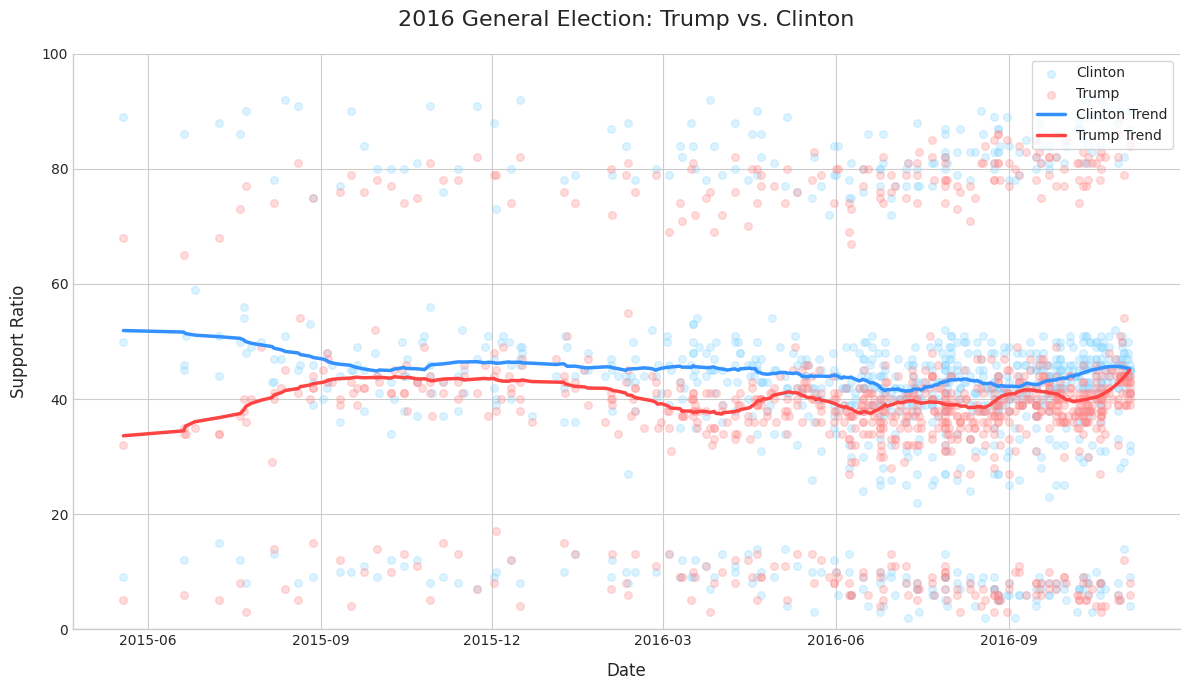

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# Sort by date
df = df.sort_values('start_date')

# Create figure and axis with a cleaner style
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot scatter points with reduced alpha for less visual noise
plt.scatter(df['start_date'], df['Clinton'], color='#8BD8FF', alpha=0.3, s=30, label='Clinton')
plt.scatter(df['start_date'], df['Trump'], color='#FF8B8B', alpha=0.3, s=30, label='Trump')

# Group by date to get mean values for trend calculation
trump_avg = df.groupby('start_date')['Trump'].mean()
clinton_avg = df.groupby('start_date')['Clinton'].mean()

# Get dates as array for trend line plotting
unique_dates = sorted(trump_avg.index)

# Apply Savitzky-Golay filter for smooth trend lines
# Ensure window length is odd and appropriate for the data size
window_length = min(51, len(trump_avg) - (len(trump_avg) % 2) - 1)
if window_length < 11:
    window_length = 11  # Minimum window for good smoothing
    
# Apply filter with polynomial order 3
trump_smooth = savgol_filter(trump_avg.values, window_length, 3)
clinton_smooth = savgol_filter(clinton_avg.values, window_length, 3)

# Plot the smooth trend lines with thicker lines
plt.plot(unique_dates, clinton_smooth, color='#3392FF', linewidth=2.5, label='Clinton Trend')
plt.plot(unique_dates, trump_smooth, color='#FF4444', linewidth=2.5, label='Trump Trend')

# Set title and labels with clean formatting
plt.title('2016 General Election: Trump vs. Clinton', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Support Ratio', fontsize=12, labelpad=10)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show fewer tick marks

# Set consistent y-axis limits
plt.ylim(0, 100)

# Add a simplified legend
plt.legend(loc='upper right', frameon=True)

# Remove the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## Question 5:


In [31]:
total_observations = df['observations'].sum()
print(f"Total number of voters observed: {total_observations}")

Total number of voters observed: 1940931.0


## Question 6:

In [32]:
# We need to weight each poll by its sample size (observations)
trump_weighted = df['Trump'] * df['observations'] / 100  # Convert percentage to proportion
clinton_weighted = df['Clinton'] * df['observations'] / 100

trump_proportion = trump_weighted.sum() / total_observations
clinton_proportion = clinton_weighted.sum() / total_observations

# Create a table for the proportions
proportion_table = pd.DataFrame({
    'Candidate': ['Trump', 'Clinton'],
    'Estimated Proportion': [f"{trump_proportion:.4f} ({trump_proportion*100:.2f}%)", 
                             f"{clinton_proportion:.4f} ({clinton_proportion*100:.2f}%)"]
})

print("\nEstimated Proportions:")
print(proportion_table)



Estimated Proportions:
  Candidate Estimated Proportion
0     Trump      0.4058 (40.58%)
1   Clinton      0.4561 (45.61%)


## Question 7:

In [33]:
# For a 95% confidence interval, we use z = 1.96
z = 1.96

# Standard error formula: sqrt(p * (1-p) / n)
trump_std_error = np.sqrt((trump_proportion * (1 - trump_proportion)) / total_observations)
clinton_std_error = np.sqrt((clinton_proportion * (1 - clinton_proportion)) / total_observations)

trump_ci = (trump_proportion - z * trump_std_error, trump_proportion + z * trump_std_error)
clinton_ci = (clinton_proportion - z * clinton_std_error, clinton_proportion + z * clinton_std_error)

# Create a table for confidence intervals
ci_table = pd.DataFrame({
    'Candidate': ['Trump', 'Clinton'],
    '95% Confidence Interval': [f"({trump_ci[0]*100:.2f}%, {trump_ci[1]*100:.2f}%)", 
                                f"({clinton_ci[0]*100:.2f}%, {clinton_ci[1]*100:.2f}%)"]
})

print("\n95% Confidence Intervals:")
print(ci_table)


95% Confidence Intervals:
  Candidate 95% Confidence Interval
0     Trump        (40.51%, 40.65%)
1   Clinton        (45.54%, 45.68%)



## Question 8:

### a)



Weighted proportion supporting Clinton (p): 0.4561
Estimated spread (d = 2p - 1): -0.0878
Standard error for p: 0.0004
Standard error for the spread: 0.0007
95% Confidence Interval for the spread: (-0.0892, -0.0864)


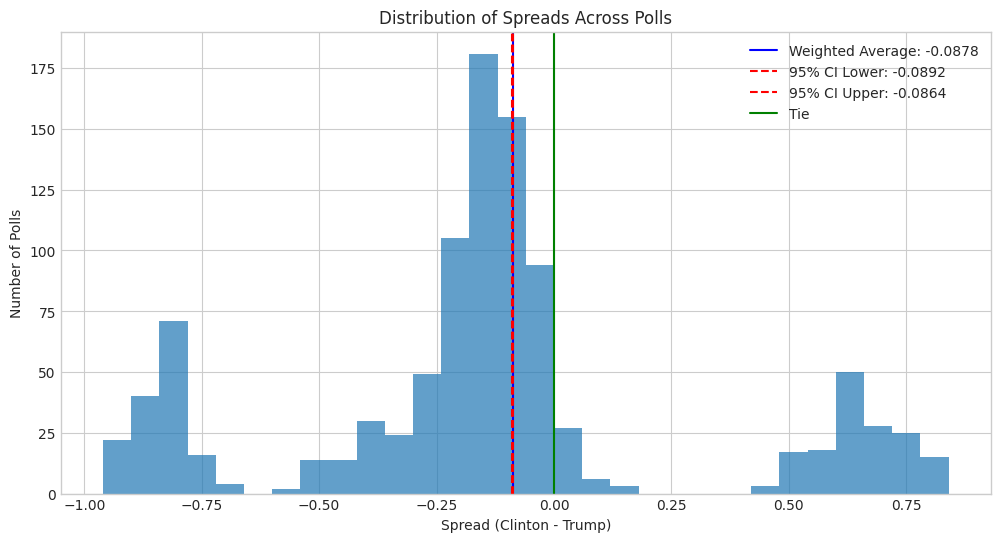

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Calculate the proportion p for Clinton (convert from percentage to proportion)
df['p_clinton'] = df['Clinton'] / 100

# Calculate the spread d = 2p - 1
df['spread'] = 2 * df['p_clinton'] - 1

# Aggregate the data to calculate overall p (weighted by sample size)
total_observations = df['observations'].sum()
weighted_p = (df['p_clinton'] * df['observations']).sum() / total_observations

# Calculate the estimated spread
estimated_spread = 2 * weighted_p - 1

# Calculate the standard error for p
se_p = np.sqrt((weighted_p * (1 - weighted_p)) / total_observations)

# Calculate the standard error for the spread (2 * SE_p)
se_spread = 2 * se_p

# Calculate the 95% confidence interval for the spread
ci_lower = estimated_spread - 1.96 * se_spread
ci_upper = estimated_spread + 1.96 * se_spread

print(f"Weighted proportion supporting Clinton (p): {weighted_p:.4f}")
print(f"Estimated spread (d = 2p - 1): {estimated_spread:.4f}")
print(f"Standard error for p: {se_p:.4f}")
print(f"Standard error for the spread: {se_spread:.4f}")
print(f"95% Confidence Interval for the spread: ({ci_lower:.4f}, {ci_upper:.4f})")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.hist(df['spread'], bins=30, alpha=0.7)
plt.axvline(x=estimated_spread, color='blue', linestyle='-', label=f'Weighted Average: {estimated_spread:.4f}')
plt.axvline(x=ci_lower, color='red', linestyle='--', label=f'95% CI Lower: {ci_lower:.4f}')
plt.axvline(x=ci_upper, color='red', linestyle='--', label=f'95% CI Upper: {ci_upper:.4f}')
plt.axvline(x=0, color='green', linestyle='-', label='Tie')
plt.xlabel('Spread (Clinton - Trump)')
plt.ylabel('Number of Polls')
plt.title('Distribution of Spreads Across Polls')
plt.legend()
plt.grid(True)
plt.show()


### b)
The hypothesis test examines whether the spread $ d $ is zero ($ H_0: d = 0 $) or not ($ H_a: d \neq 0 $). The test statistic is formulated as:

$$
t = \frac{1 - 2\hat{p}}{2 \times \sqrt{\frac{\hat{p}(1 - \hat{p})}{N}}}
$$

where $ \hat{p} $ is the estimated proportion voting for Clinton, and $ N $ is the sample size.

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

# Conduct hypothesis test
# H0: d = 0 (spread is zero)
# Ha: d ≠ 0 (spread is not zero)

# Calculate the test statistic using above formula
t_statistic = (1 - 2*weighted_p) / (2 * np.sqrt((weighted_p * (1 - weighted_p)) / total_observations))

# Since the spread d = 2p - 1, and we're testing if d = 0
# This is equivalent to testing if 2p - 1 = 0, or p = 0.5
# Alternative calculation for test statistic (should give same result but with opposite sign)
t_statistic_alt = estimated_spread / se_spread

# Calculate the p-value for a two-sided test
p_value = 2 * (1 - stats.norm.cdf(abs(t_statistic_alt)))

# Print results
print("Hypothesis Test Results:")
print(f"H0: d = 0 (spread is zero)")
print(f"Ha: d ≠ 0 (spread is not zero)")
print(f"Test statistic: {t_statistic_alt:.4f}")
print(f"p-value: {p_value:.4f}")


Hypothesis Test Results:
H0: d = 0 (spread is zero)
Ha: d ≠ 0 (spread is not zero)
Test statistic: -122.7361
p-value: 0.0000


Conclusion (α = 0.05): Reject the null hypothesis. The p-value is 0, providing strong evidence to reject the null hypothesis. This confirms that the spread between Clinton and Trump is statistically significant.